In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Read file
df = pd.read_csv("clean_methane_hist_emissions.csv")

In [ ]:
sectors = df['Sector'].unique()
countries = df['Country'].unique()

# Historic emissions by sector

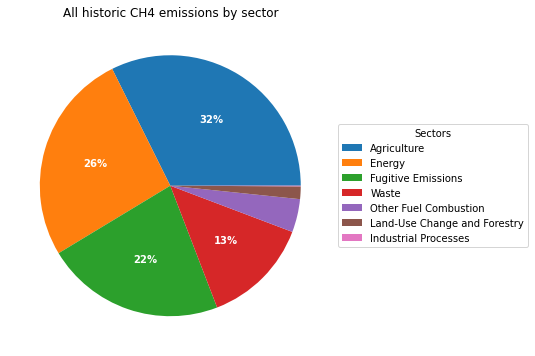

In [19]:
totalEmissionsBySector = df.groupby('Sector').sum()
totalEmissionsBySector.sort_values(by='Measures', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100. * np.sum(allvals)))
    if(pct > 5):
        return "{:.0f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(totalEmissionsBySector.Measures, autopct=lambda pct: func(pct, totalEmissionsBySector.Measures), textprops=dict(color="white"))
ax.legend(wedges, totalEmissionsBySector.index, title="Sectors", loc="center left", bbox_to_anchor=(1, 0, 0, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("All historic CH4 emissions by sector")

plt.show()

# Historic emissions for a country

Enter country: 


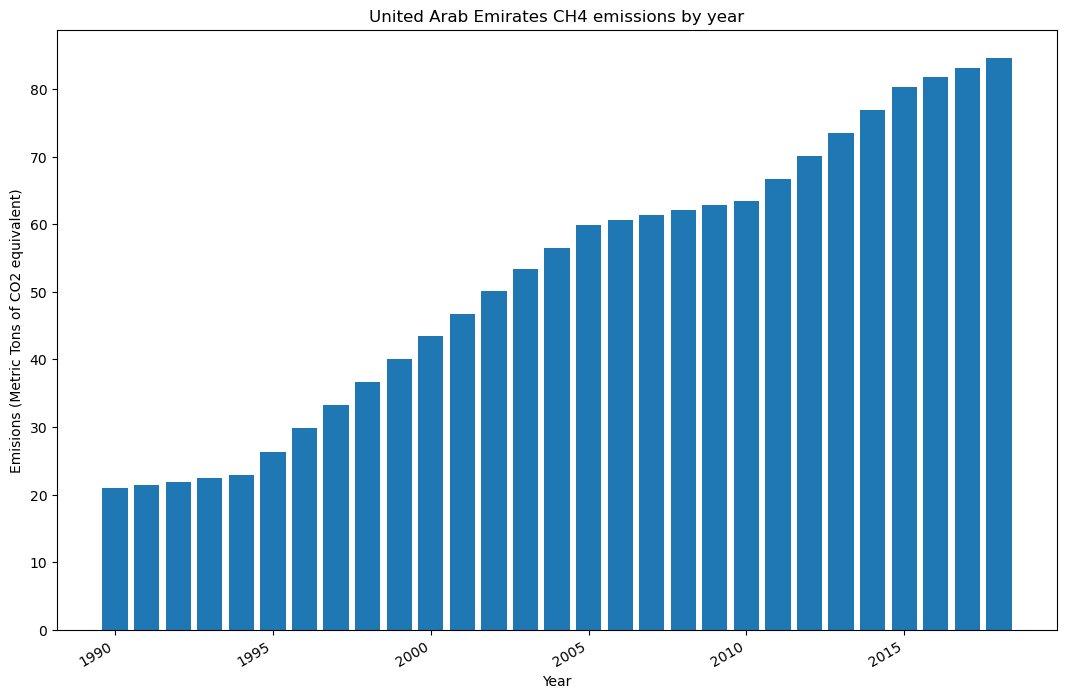

In [24]:
print("Enter country: ")
inputCountry = input()

countryEmissions = df[df.Country == inputCountry].groupby('Date').sum()

fig = plt.figure(figsize=(10, 6), dpi=100)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Year')
ax.set_ylabel('Emisions (Metric Tons of CO2 equivalent)')
fig.autofmt_xdate()
ax.bar(countryEmissions.index, countryEmissions.Measures)
plt.title(inputCountry + " CH4 emissions by year")
plt.show()